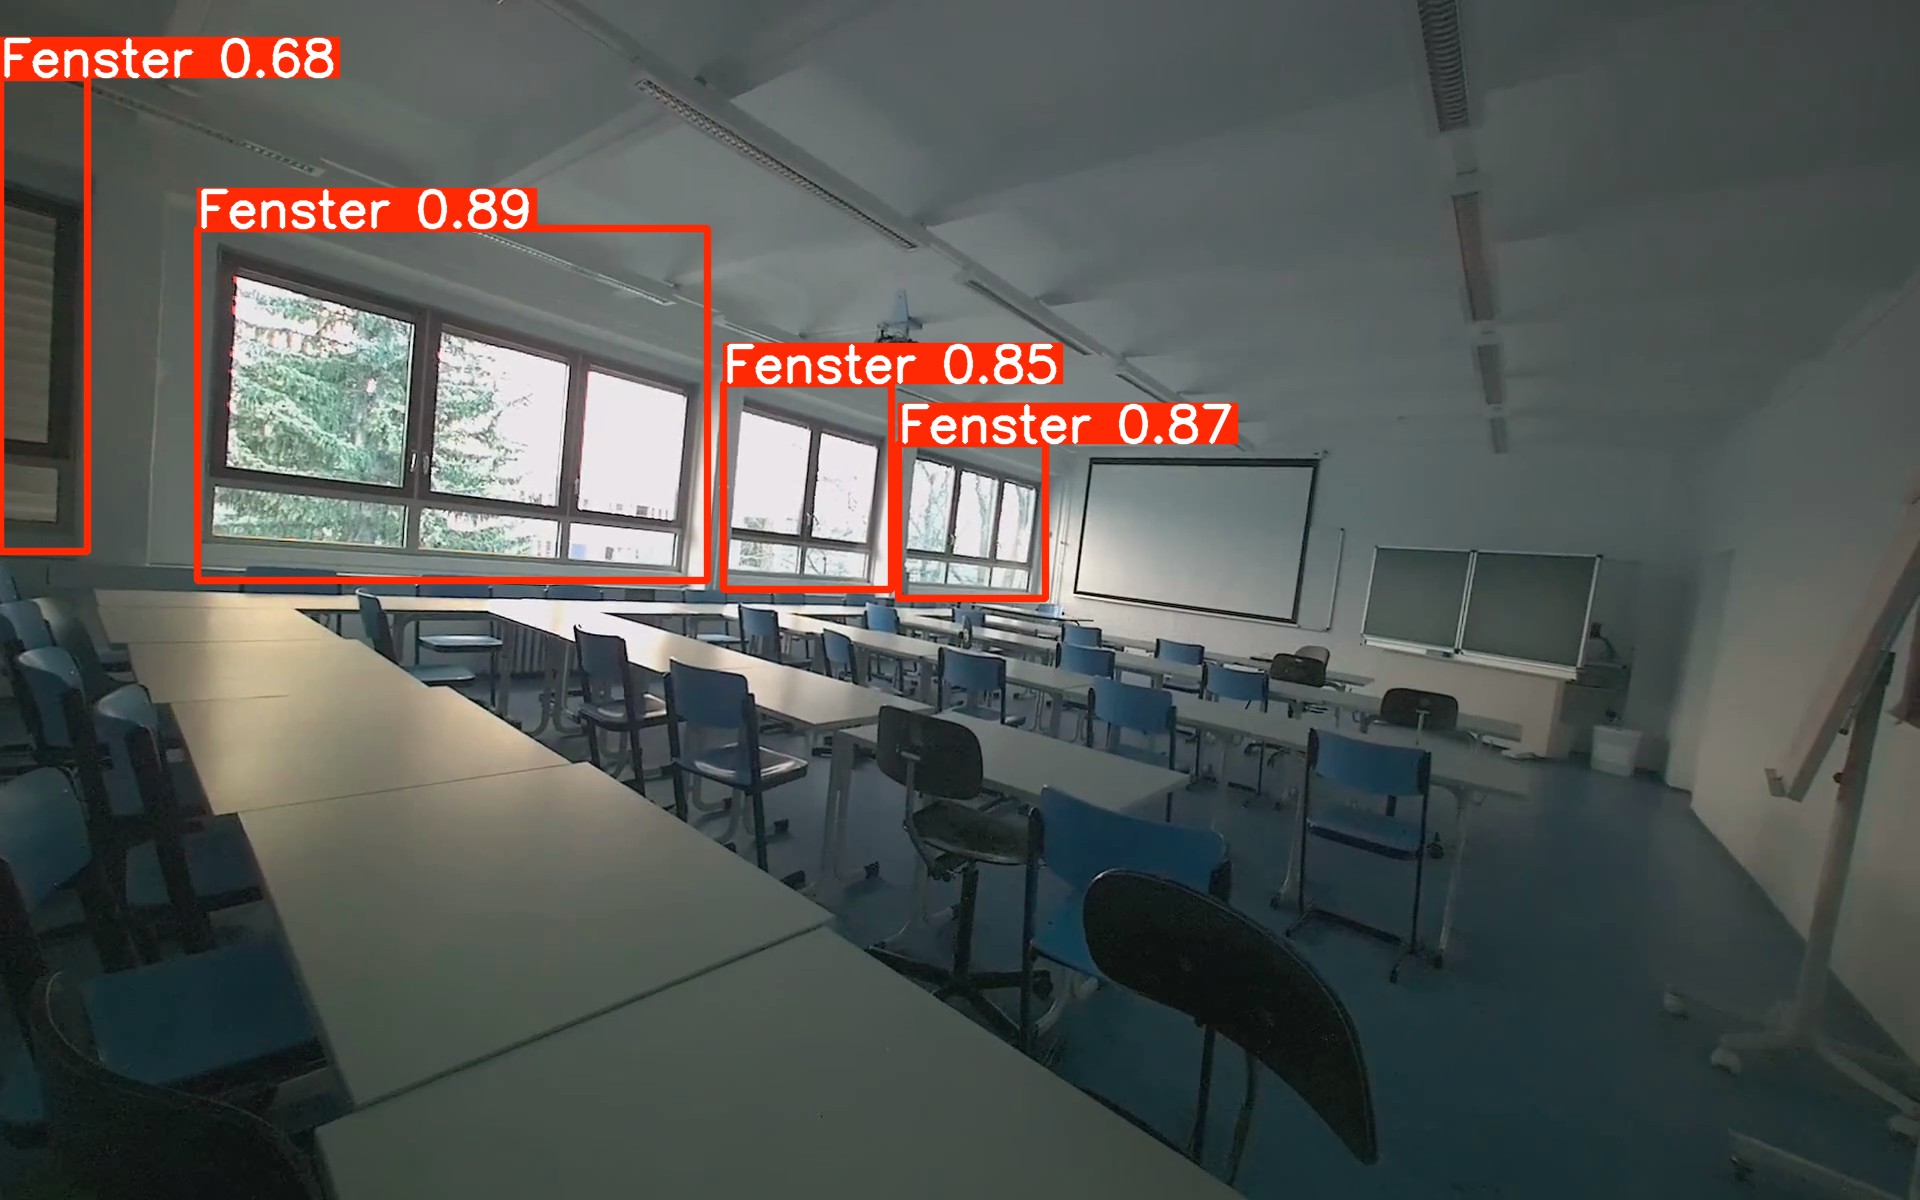

In [4]:
import cv2
from ultralytics import YOLO
from IPython.display import display, Image, clear_output
import os
from dotenv import load_dotenv


load_dotenv("settings.env")

model = YOLO(os.environ["MODEL"])
video_path = "/home/freeze/GIT/onemanstreasure/evaluation/room312_benchmark.mp4"

cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break

    # Run YOLO inference
    results = model(frame)
    annotated_frame = results[0].plot()

    # Convert BGR to RGB for display
    annotated_frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

    # Display in notebook
    clear_output(wait=True)
    display(Image(data=cv2.imencode('.png', annotated_frame_rgb)[1].tobytes()))

    # Optional: slow down playback
    # import time; time.sleep(0.05)

cap.release()

In [ ]:
import cv2
from ultralytics import YOLO
from IPython.display import display, Image, clear_output
import os
from dotenv import load_dotenv


load_dotenv("settings.env")

model = YOLO(os.environ["MODEL"])
video_path = "/home/freeze/GIT/onemanstreasure/evaluation/leuthener_benchmark.mp4"

cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break

    # Run YOLO inference
    results = model(frame)
    annotated_frame = results[0].plot()

    # Convert BGR to RGB for display
    annotated_frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

    # Display in notebook
    clear_output(wait=True)
    display(Image(data=cv2.imencode('.png', annotated_frame_rgb)[1].tobytes()))

    # Optional: slow down playback
    # import time; time.sleep(0.05)

cap.release()

#evaluation metric calculation doesnt work yet

In [ ]:
from ultralytics import YOLO
from dotenv import load_dotenv
import os


load_dotenv("settings.env")

# Load a model
model = YOLO(os.environ["MODEL"])  # Load a custom model

# Validate with a custom dataset
metrics = model.val(data=os.environ["EVALUATION_DATASET"]+"/data.yaml")
print(metrics.box.map)  # map50-95